In [22]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
X = iris.data
Y = iris.target

In [6]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [9]:
iris_data = DataFrame(X,columns=['sepal length','sepal width','petal length','petal width'])
iris_target = DataFrame(Y,columns = ['Species'])

In [10]:
iris_data.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
iris_target.tail()

,Species
145,2
146,2
147,2
148,2
149,2


In [13]:
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versicolour'
    else:
        return 'Virginica'

In [15]:
iris_target['Species'] = iris_target['Species'].apply(flower)

In [16]:
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [19]:
iris = pd.concat([iris_data,iris_target],axis=1)

iris.head()

,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


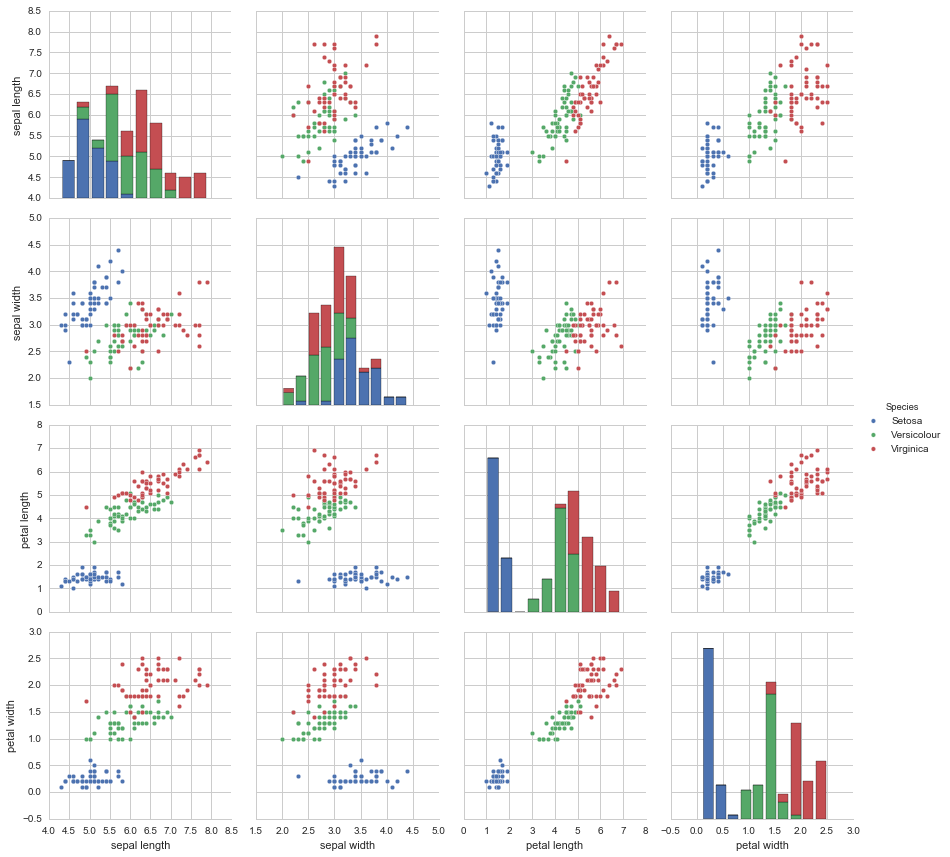

In [25]:
sns.pairplot(iris,hue='Species',size=3)

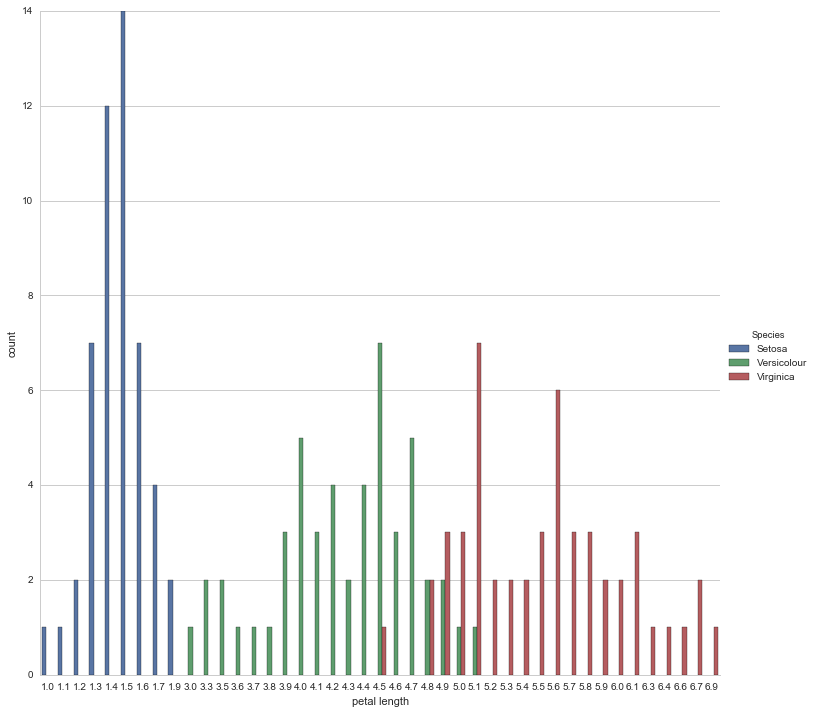

In [27]:
sns.factorplot('petal length',data=iris,hue='Species',size=10,kind='count')

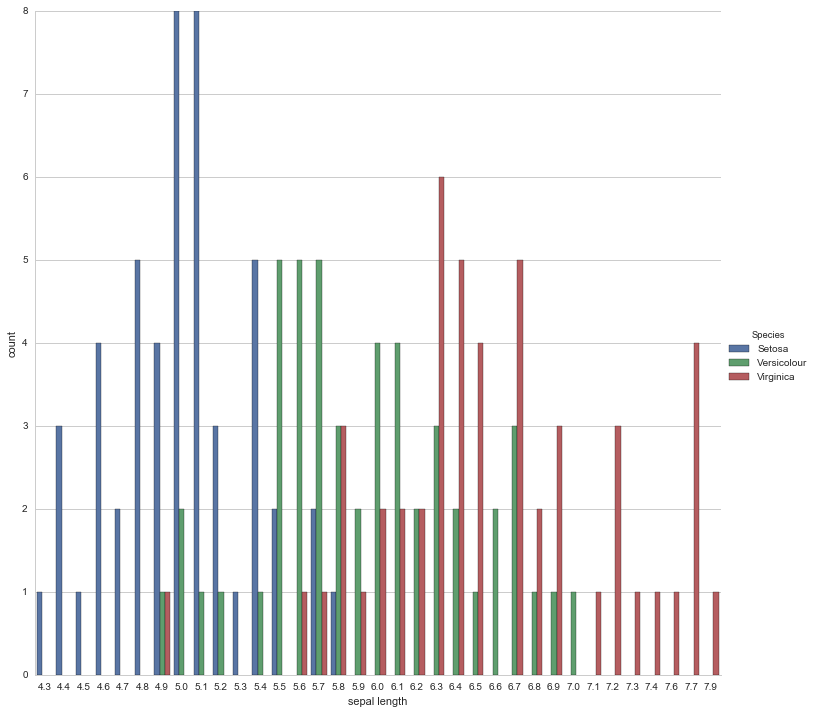

In [28]:
sns.factorplot('sepal length',data=iris,hue='Species',size=10,kind='count')

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [32]:
logreg = LogisticRegression()

In [95]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.6,random_state=3)

In [54]:
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
from sklearn import metrics

In [56]:
Y_predict = logreg.predict(X_test)

In [57]:
print(metrics.accuracy_score(Y_test,Y_predict))

0.944444444444


In [69]:
def predict(sl,sw,pl,pw):
    pred = np.array([sl,sw,pl,pw])
    num = logreg.predict(pred)
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versicolour'
    else:
        return 'Virginica'

In [74]:
predict(1.2,4.2,5.3,2.3)

C:\Users\Harmandeep\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


'Virginica'

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knn = KNeighborsClassifier(n_neighbors = 6)

In [82]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [83]:
Y_pred1 = knn.predict(X_test)

In [85]:
print(metrics.accuracy_score(Y_test,Y_pred1))

0.966666666667


In [96]:
accuracy  = []
k_range = range(1,21)
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,Y_train)
    Y_pred2 = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred2))

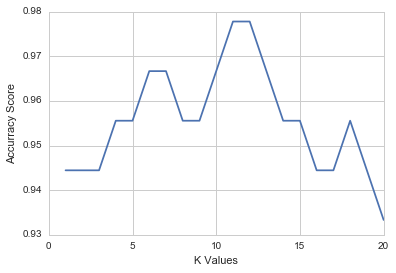

In [97]:
plt.plot(k_range,accuracy)
plt.xlabel('K Values')
plt.ylabel('Accurracy Score')

In [102]:
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(X_train,Y_train)
Y_pred3 = knn.predict(X_test)
print(metrics.accuracy_score(Y_test,Y_pred3))

0.977777777778
